# paper: FRB 220330aaan

In [1]:
import sys
sys.path.insert(1, '/home/ubuntu/gechen/software/burstfit/examples/')
import import_ipynb
import BurstFit_paper_template as paper_fit

from burstfit.utils.functions import pulse_fn, sgram_fn_vec, sgram_fn, gauss, gauss_norm, model_free_4, model_free_normalized_4, power_law # pulse_fn_vec  
import numpy as np

%matplotlib inline 

importing Jupyter notebook from BurstFit_paper_template.ipynb


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/plotter.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/ubuntu/anac

datacite/tind env not found. Cannot use datacite API


In [2]:
# input variables 
candidate = '220330aaan'
datestring = '2022_3_29_23_4_54'
beam = 164
corr = 'corr09'
snr_heimdall = 12.9
dm_heimdall = 467.8
width_heimdall = 32 

voltage = True
dedisperse = False 
fil_file = '/home/ubuntu/vikram/scratch/' + candidate + '.fil'
mask_chans=[] 
nfreq = 4 
fil_file_dedispersed = '/home/ubuntu/gechen/software/burstfit/fil_files_dedispersed/%s_%d_%s.txt'%(candidate, nfreq, str(voltage))

2022-06-08 22:29:28,694 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-06-08 22:29:28,797 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-06-08 22:29:28,799 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-06-08 22:29:28,836 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (36.063605401529635, 21.164850863543236)


using filterbank  /data/dsa110/T1/corr09/2022_3_29_23_4_54/fil_220330aaan/220330aaan_164.fil


2022-06-08 22:29:28,848 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-06-08 22:29:33,406 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-06-08 22:29:33,408 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-06-08 22:29:33,916 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (48.485731547836686, 34.48629160699933)


using filterbank  /home/ubuntu/vikram/scratch/220330aaan.fil
/home/ubuntu/vikram/scratch/220330aaan.fil 3.2768e-05 0.000262144


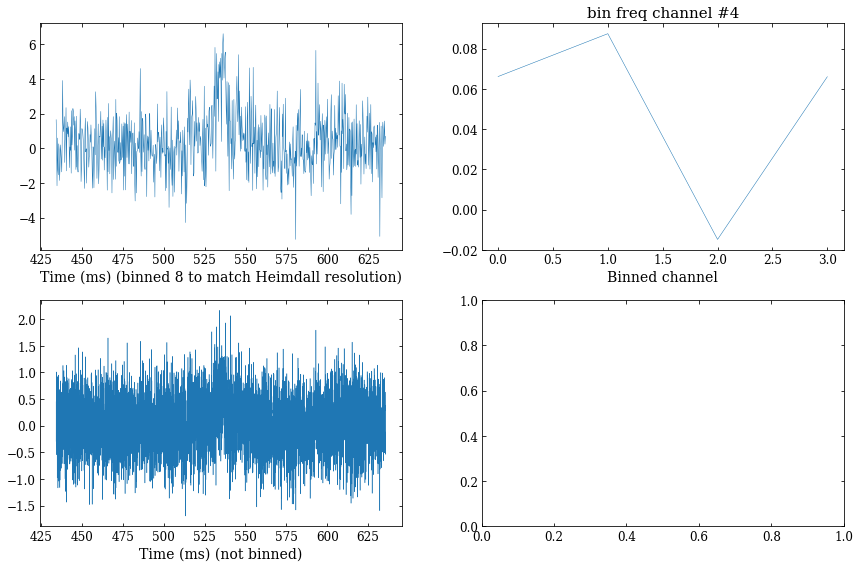

In [10]:
bd_heimdall, fil_file_heimdall  = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, 
                           datestring=datestring, beam=beam, corr=corr, 
                           fil_file=fil_file, voltage=False)

bd, fil_file  = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, 
                           datestring=datestring, beam=beam, corr=corr, 
                           fil_file=fil_file, voltage=True)


print(fil_file, bd.tsamp, bd_heimdall.tsamp)
data_burst = paper_fit.prepare_burst_data(fil_file, fil_file_dedispersed, candidate, bd_heimdall, bd, voltage = voltage,
                                t_chop_center_s=0.5, t_chop_width = 3 * width_heimdall, 
                               dedisperse=dedisperse, nfreq = nfreq)

## S1: Spectrum--  4 channels, normalized
## T1: Time profile-- Gaussian 
## T2: Time profile-- Gaussian + scattering
## cx: x-components in time profile 

### No scattering

self.function_input_names:  ['S', 'mu', 'sigma']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-08 22:31:36,447 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 22:31:36,449 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 22:31:36,453 - tests -root - INFO - P values: T-test (0.10740), Kruskal (0.08986), KS (0.09352), F-test (0.98205)
2022-06-08 22:31:36,454 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-08 22:31:36,457 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00005), F-test (0.36850)
2022-06-08 22:31:36,459 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-08 22:31:36,462 - tests -root - INFO - P values: T-test (0.00001), Kruskal (0.00012), KS (0.00016), F-test (0.00750)
2022-06-08 22:31:36,464 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-08 22:31:36,465 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-08 22:31:36,467 - initial_profi

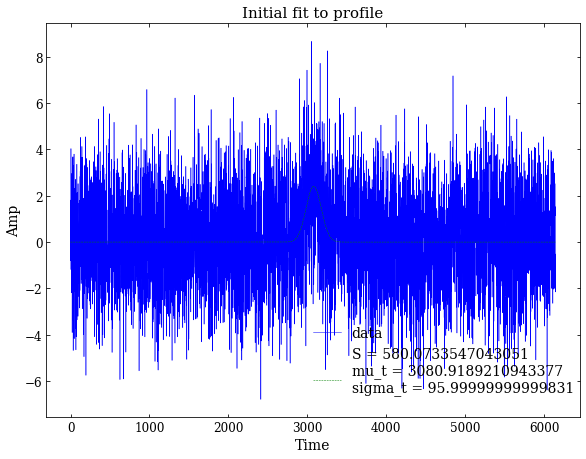

2022-06-08 22:31:36,888 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 22:31:36,891 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f890cfe4400>
[0.48726165 0.16853723 0.37286037 0.4299433 ]


2022-06-08 22:31:36,898 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 22:31:36,900 - initial_spectrafit -burstfit.fit - INFO - c0: 0.48726165294647217 +- 0.0
2022-06-08 22:31:36,903 - initial_spectrafit -burstfit.fit - INFO - c1: 0.1685372292995453 +- 0.0
2022-06-08 22:31:36,905 - initial_spectrafit -burstfit.fit - INFO - c2: 0.3728603720664978 +- 0.0


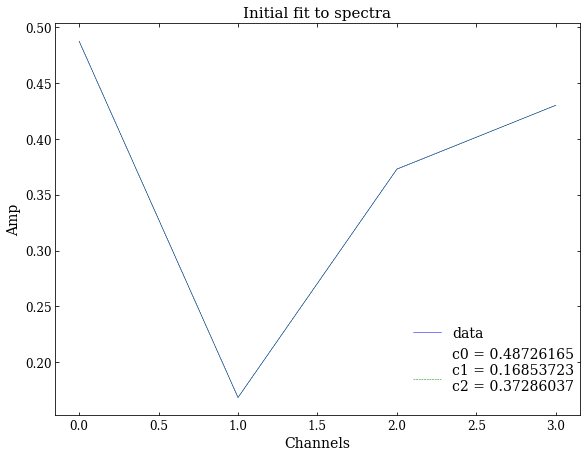

2022-06-08 22:31:37,054 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-08 22:31:37,057 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.48726165, 0.16853723, 0.37286037, 580.0733547043051, 3080.9189210943377, 95.99999999999831, 467.8]
2022-06-08 22:31:37,135 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 22:31:37,139 - sgram_fit -burstfit.fit - INFO - c0: 0.4361085275056614 +- 0.036574209940782365
2022-06-08 22:31:37,140 - sgram_fit -burstfit.fit - INFO - c1: 0.2289386675542261 +- 0.02972900421933677
2022-06-08 22:31:37,142 - sgram_fit -burstfit.fit - INFO - c2: 0.355085838724102 +- 0.029262956636770632
2022-06-08 22:31:37,143 - sgram_fit -burstfit.fit - INFO - S: 502.95122218621424 +- 15.134357034698729
2022-06-08 22:31:37,145 - sgram_fit -burstfit.fit - INFO - mu_t: 3053.0881379758075 +- 11.288184678700507
2022-06-08 22:31:37,146 - sgram_fit -burstfit.fit - INFO - sigma_t: 100.6521220041867 +- 3.523

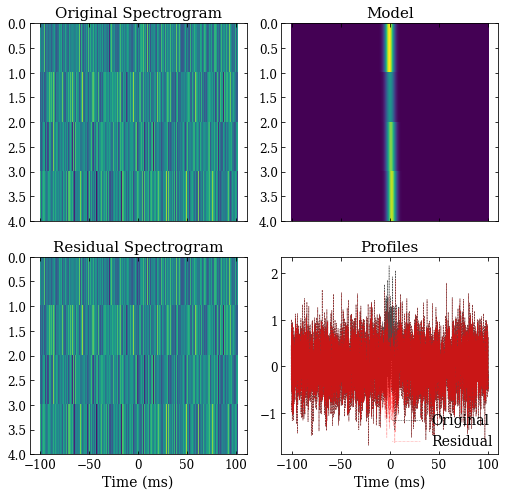

2022-06-08 22:31:37,710 - model -burstfit.fit - INFO - Making model.
2022-06-08 22:31:37,713 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 22:31:37,717 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 22:31:37,720 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 22:31:37,721 - model -burstfit.fit - INFO - Making model.
2022-06-08 22:31:37,723 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 22:31:37,728 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.9943029966985086
2022-06-08 22:31:37,730 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-08 22:31:37,732 - fitall -burstfit.fit - INFO - Final number of components = 1. Terminating fitting.
2022-06-08 22:31:37,734 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to

{bf}.calc_redchisq()= 0.9943029966985086


In [17]:
bf_S1T1_c1 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t'], gauss, 
          [(0, 2500, 0),(np.inf, 3500, 3*bd.width)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 1, plot = True)

self.function_input_names:  ['S', 'mu', 'sigma']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-08 22:32:12,543 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 22:32:12,545 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 22:32:12,551 - tests -root - INFO - P values: T-test (0.10740), Kruskal (0.08986), KS (0.09352), F-test (0.98205)
2022-06-08 22:32:12,552 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-08 22:32:12,557 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00005), F-test (0.36850)
2022-06-08 22:32:12,559 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-08 22:32:12,563 - tests -root - INFO - P values: T-test (0.00001), Kruskal (0.00012), KS (0.00016), F-test (0.00750)
2022-06-08 22:32:12,565 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-08 22:32:12,566 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-08 22:32:12,568 - initial_profi

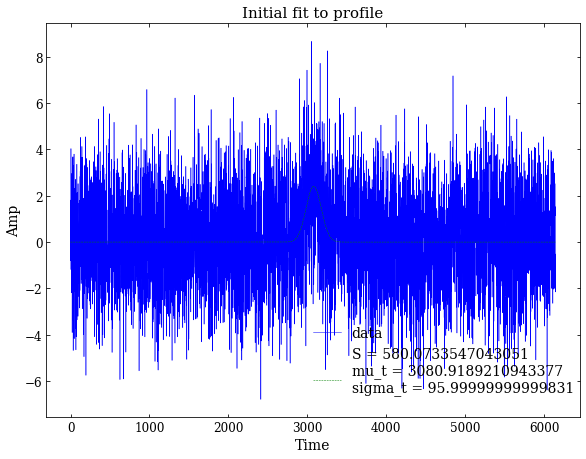

2022-06-08 22:32:12,915 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 22:32:12,918 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f890cfe4400>
[0.48726165 0.16853723 0.37286037 0.4299433 ]


2022-06-08 22:32:12,925 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 22:32:12,928 - initial_spectrafit -burstfit.fit - INFO - c0: 0.48726165294647217 +- 0.0
2022-06-08 22:32:12,930 - initial_spectrafit -burstfit.fit - INFO - c1: 0.1685372292995453 +- 0.0
2022-06-08 22:32:12,931 - initial_spectrafit -burstfit.fit - INFO - c2: 0.3728603720664978 +- 0.0


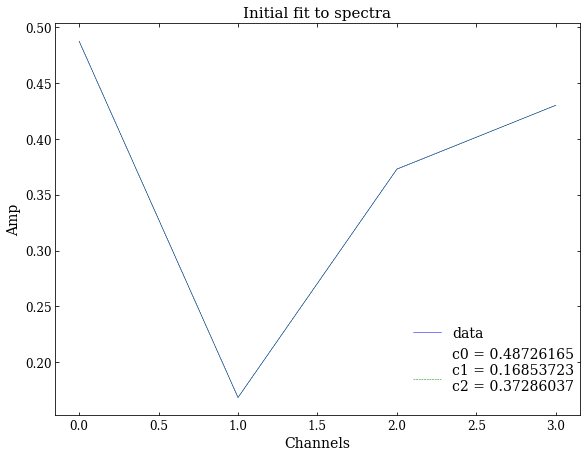

2022-06-08 22:32:13,120 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-08 22:32:13,122 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.48726165, 0.16853723, 0.37286037, 580.0733547043051, 3080.9189210943377, 95.99999999999831, 467.8]
2022-06-08 22:32:13,198 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 22:32:13,199 - sgram_fit -burstfit.fit - INFO - c0: 0.4361085275056614 +- 0.036574209940782365
2022-06-08 22:32:13,200 - sgram_fit -burstfit.fit - INFO - c1: 0.2289386675542261 +- 0.02972900421933677
2022-06-08 22:32:13,201 - sgram_fit -burstfit.fit - INFO - c2: 0.355085838724102 +- 0.029262956636770632
2022-06-08 22:32:13,202 - sgram_fit -burstfit.fit - INFO - S: 502.95122218621424 +- 15.134357034698729
2022-06-08 22:32:13,203 - sgram_fit -burstfit.fit - INFO - mu_t: 3053.0881379758075 +- 11.288184678700507
2022-06-08 22:32:13,204 - sgram_fit -burstfit.fit - INFO - sigma_t: 100.6521220041867 +- 3.523

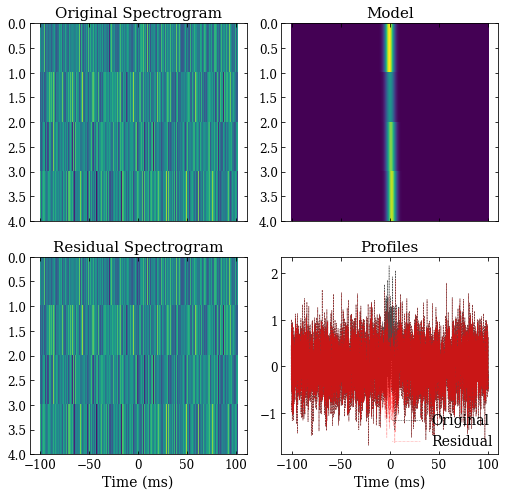

2022-06-08 22:32:14,000 - model -burstfit.fit - INFO - Making model.
2022-06-08 22:32:14,003 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 22:32:14,007 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 22:32:14,010 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 22:32:14,012 - model -burstfit.fit - INFO - Making model.
2022-06-08 22:32:14,013 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 22:32:14,018 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.9943029966985086
2022-06-08 22:32:14,019 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 2
2022-06-08 22:32:14,020 - fitcycle -burstfit.fit - INFO - Fitting component 2.
2022-06-08 22:32:14,022 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 2
2022-06-08 22:32:14,097 - initial_profile

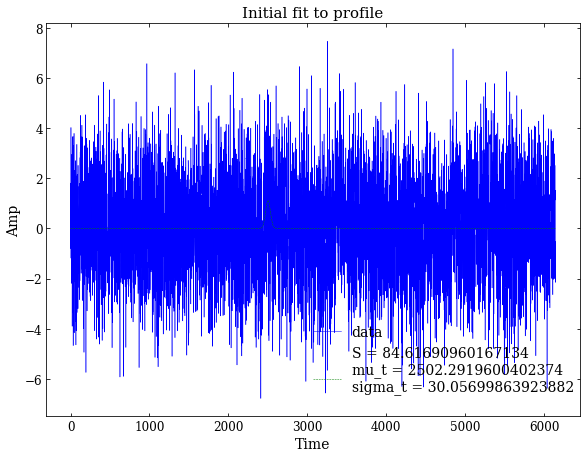

2022-06-08 22:32:14,455 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 22:32:14,457 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 2


<function model_free_normalized_4 at 0x7f890cfe4400>
[1.0418998151058843 0.31771289316883844 0.18780998784804473
 -0.052945577139650736]


2022-06-08 22:32:14,463 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 22:32:14,466 - initial_spectrafit -burstfit.fit - INFO - c0: 1.0418998151058843 +- 0.0
2022-06-08 22:32:14,467 - initial_spectrafit -burstfit.fit - INFO - c1: 0.31771289316883844 +- 0.0
2022-06-08 22:32:14,469 - initial_spectrafit -burstfit.fit - INFO - c2: 0.18780998784804473 +- 0.0


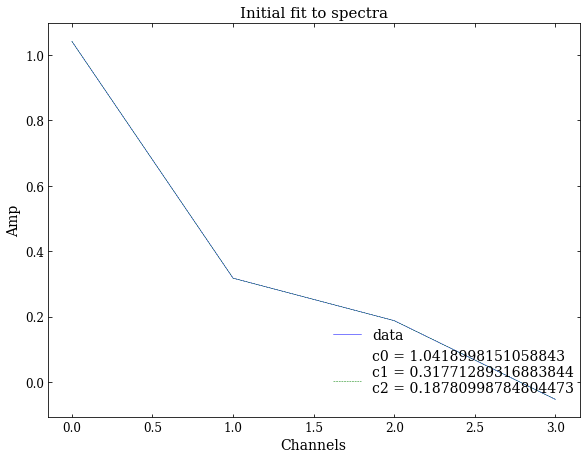

2022-06-08 22:32:14,606 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 2
2022-06-08 22:32:14,608 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [1.0418998151058843, 0.31771289316883844, 0.18780998784804473, 84.61690960167134, 2502.2919600402374, 30.05699863923882, 467.8]
2022-06-08 22:32:14,699 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 22:32:14,701 - sgram_fit -burstfit.fit - INFO - c0: 0.8202712774492019 +- 0.15338479338288097
2022-06-08 22:32:14,703 - sgram_fit -burstfit.fit - INFO - c1: 0.3449659954900936 +- 0.11342478771872726
2022-06-08 22:32:14,705 - sgram_fit -burstfit.fit - INFO - c2: 0.22193329922445582 +- 0.11482311982318713
2022-06-08 22:32:14,707 - sgram_fit -burstfit.fit - INFO - S: 74.72516716739135 +- 5.529996592111638
2022-06-08 22:32:14,709 - sgram_fit -burstfit.fit - INFO - mu_t: 2500.8585508100055 +- 8.319683038962927
2022-06-08 22:32:14,711 - sgram_fit -burstfit.fit - INFO - sigma_t: 33.

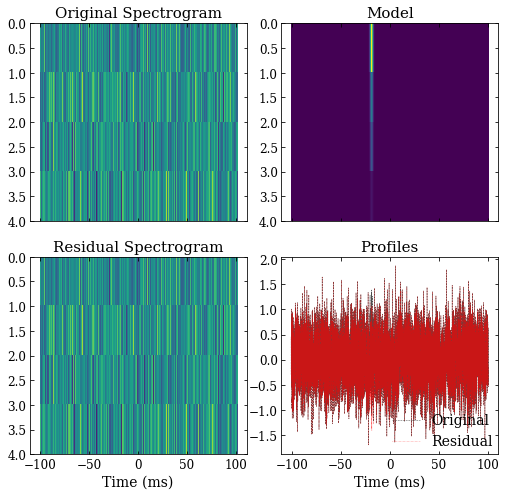

2022-06-08 22:32:15,358 - model -burstfit.fit - INFO - Making model.
2022-06-08 22:32:15,360 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 22:32:15,364 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 22:32:15,365 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 22:32:15,366 - model -burstfit.fit - INFO - Making model.
2022-06-08 22:32:15,369 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 22:32:15,376 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.9847488490950316
2022-06-08 22:32:15,378 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-08 22:32:15,379 - fitall -burstfit.fit - INFO - Final number of components 2 > 1. Fitting all components together.
2022-06-08 22:32:15,381 - fit_all_components -burstfit.fit - INFO - Fitting 2 components together.
2022-

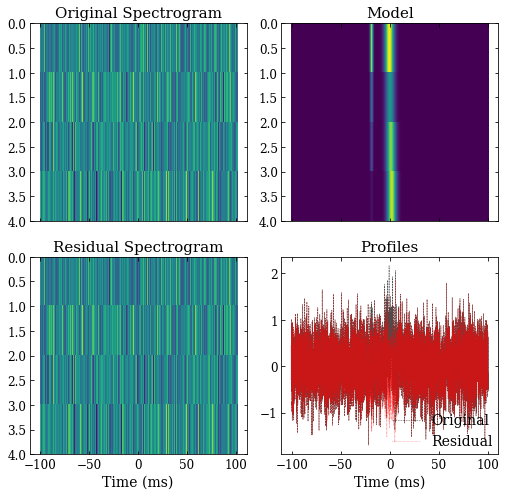

2022-06-08 22:32:16,067 - model -burstfit.fit - INFO - Making model.
2022-06-08 22:32:16,069 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 22:32:16,075 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 22:32:16,077 - get_off_pulse_region -burstfit.fit - INFO - Using sgram all-component-fit parameters.
2022-06-08 22:32:16,078 - model -burstfit.fit - INFO - Making model.
2022-06-08 22:32:16,080 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 22:32:16,085 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.9847488490950316
2022-06-08 22:32:16,086 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 22:32:16,088 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 22:32:16,092 - tests -root - INFO - P values: T-test (0.10740), Kruskal (0.08986), KS (0.09352), F-test (0.98205)
2022-06-08 22:3

{bf}.calc_redchisq()= 0.9847488490950316


In [18]:
bf_S1T1_c2 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t'], gauss, 
          [(0, 2500, 0),(np.inf, 3500, 3*bd.width)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 2, plot = True)

### with scattering

self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-08 22:32:28,942 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 22:32:28,945 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 22:32:28,949 - tests -root - INFO - P values: T-test (0.10740), Kruskal (0.08986), KS (0.09352), F-test (0.98205)
2022-06-08 22:32:28,951 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-08 22:32:28,955 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00005), F-test (0.36850)
2022-06-08 22:32:28,957 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-08 22:32:28,961 - tests -root - INFO - P values: T-test (0.00001), Kruskal (0.00012), KS (0.00016), F-test (0.00750)
2022-06-08 22:32:28,963 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-08 22:32:28,965 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-08 22:32:28,968 - initial_profi

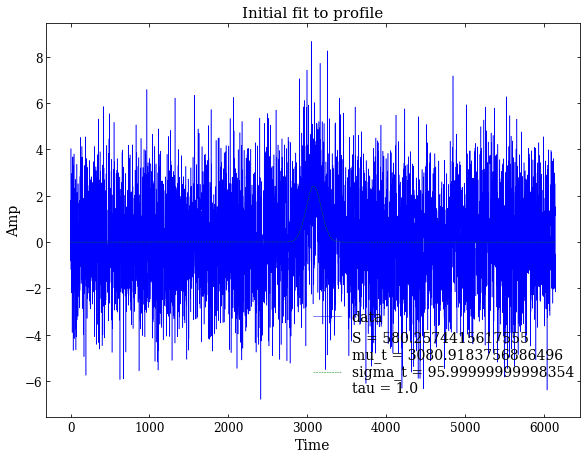

2022-06-08 22:32:29,382 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 22:32:29,384 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f890cfe4400>
[0.48397598 0.1715608  0.37367234 0.42555767]


2022-06-08 22:32:29,391 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 22:32:29,394 - initial_spectrafit -burstfit.fit - INFO - c0: 0.48397597670555115 +- 0.0
2022-06-08 22:32:29,396 - initial_spectrafit -burstfit.fit - INFO - c1: 0.17156079411506653 +- 0.0
2022-06-08 22:32:29,397 - initial_spectrafit -burstfit.fit - INFO - c2: 0.37367233633995056 +- 0.0


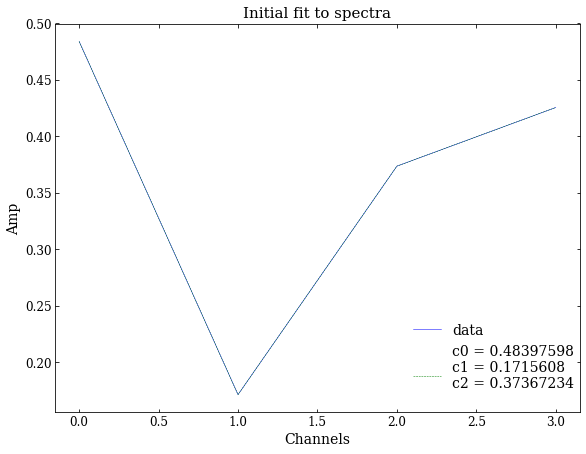

2022-06-08 22:32:29,555 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-08 22:32:29,557 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.48397598, 0.1715608, 0.37367234, 580.2574415617555, 3080.9183756886496, 95.99999999998354, 1.0, 467.8]
2022-06-08 22:32:29,652 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-06-08 22:32:30,741 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 22:32:30,743 - sgram_fit -burstfit.fit - INFO - c0: 0.4503501987419358 +- 0.039335006526501924
2022-06-08 22:32:30,745 - sgram_fit -burstfit.fit - INFO - c1: 0.20503137548471403 +- 0.03203845760143855
2022-06-08 22:32:30,746 - sgram_fit -burstfit.fit - INFO - c2: 0.36291591418097424 +- 0.03126470046247765
2022-06-08 22:32:30,748 - sgram_fit -burstfit.fit - INFO - S: 491.04310061898343 +- 13.50940680347852
2022-06-08 22:32:30,749 - sgram_fit -burstfit.fit - INFO - mu_t: 3056

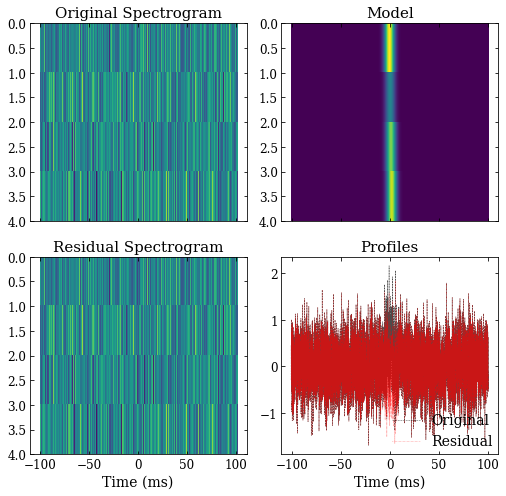

2022-06-08 22:32:31,275 - model -burstfit.fit - INFO - Making model.
2022-06-08 22:32:31,276 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 22:32:31,279 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 22:32:31,281 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 22:32:31,283 - model -burstfit.fit - INFO - Making model.
2022-06-08 22:32:31,284 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 22:32:31,292 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.9913392705391665
2022-06-08 22:32:31,293 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-08 22:32:31,294 - fitall -burstfit.fit - INFO - Final number of components = 1. Terminating fitting.
2022-06-08 22:32:31,297 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to

{bf}.calc_redchisq()= 0.9913392705391665


In [19]:
bf_S1T2_c1 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t', 'tau'], pulse_fn, 
          [(0, 2500, 0, 0),(np.inf, 3500, 3*bd.width, np.inf)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 1, plot = True)


self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-08 22:33:44,597 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 22:33:44,599 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 22:33:44,603 - tests -root - INFO - P values: T-test (0.10740), Kruskal (0.08986), KS (0.09352), F-test (0.98205)
2022-06-08 22:33:44,605 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-08 22:33:44,610 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00005), F-test (0.36850)
2022-06-08 22:33:44,611 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-08 22:33:44,615 - tests -root - INFO - P values: T-test (0.00001), Kruskal (0.00012), KS (0.00016), F-test (0.00750)
2022-06-08 22:33:44,617 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-08 22:33:44,619 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-08 22:33:44,620 - initial_profi

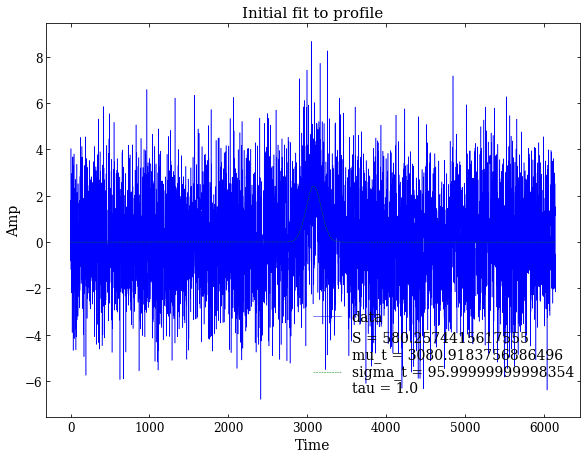

2022-06-08 22:33:45,207 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 22:33:45,209 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7f890cfe4400>
[0.48397598 0.1715608  0.37367234 0.42555767]


2022-06-08 22:33:45,214 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 22:33:45,216 - initial_spectrafit -burstfit.fit - INFO - c0: 0.48397597670555115 +- 0.0
2022-06-08 22:33:45,217 - initial_spectrafit -burstfit.fit - INFO - c1: 0.17156079411506653 +- 0.0
2022-06-08 22:33:45,219 - initial_spectrafit -burstfit.fit - INFO - c2: 0.37367233633995056 +- 0.0


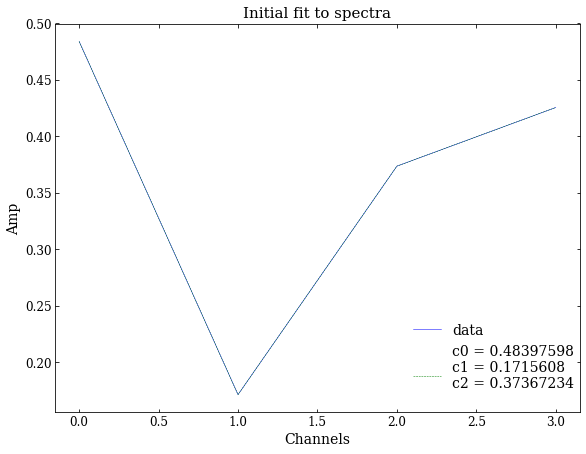

2022-06-08 22:33:45,366 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-08 22:33:45,367 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.48397598, 0.1715608, 0.37367234, 580.2574415617555, 3080.9183756886496, 95.99999999998354, 1.0, 467.8]
2022-06-08 22:33:45,436 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-06-08 22:33:47,702 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 22:33:47,705 - sgram_fit -burstfit.fit - INFO - c0: 0.4503501987419358 +- 0.039335006526501924
2022-06-08 22:33:47,707 - sgram_fit -burstfit.fit - INFO - c1: 0.20503137548471403 +- 0.03203845760143855
2022-06-08 22:33:47,709 - sgram_fit -burstfit.fit - INFO - c2: 0.36291591418097424 +- 0.03126470046247765
2022-06-08 22:33:47,711 - sgram_fit -burstfit.fit - INFO - S: 491.04310061898343 +- 13.50940680347852
2022-06-08 22:33:47,713 - sgram_fit -burstfit.fit - INFO - mu_t: 3056

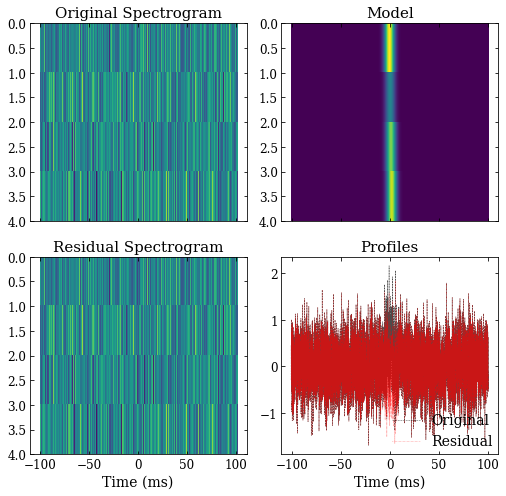

2022-06-08 22:33:48,252 - model -burstfit.fit - INFO - Making model.
2022-06-08 22:33:48,255 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 22:33:48,259 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 22:33:48,261 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 22:33:48,264 - model -burstfit.fit - INFO - Making model.
2022-06-08 22:33:48,265 - model -burstfit.fit - INFO - Found 1 components.
2022-06-08 22:33:48,271 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.9913392705391665
2022-06-08 22:33:48,272 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 2
2022-06-08 22:33:48,273 - fitcycle -burstfit.fit - INFO - Fitting component 2.
2022-06-08 22:33:48,275 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 2
2022-06-08 22:33:48,352 - initial_profile

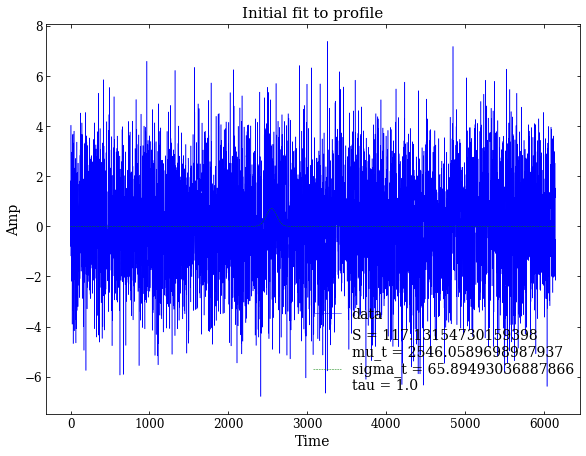

2022-06-08 22:33:48,665 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-08 22:33:48,667 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 2


<function model_free_normalized_4 at 0x7f890cfe4400>
[0.9321001804105318 0.22779636200351844 0.1735650571555172
 0.26517698127139705]


2022-06-08 22:33:48,670 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-08 22:33:48,671 - initial_spectrafit -burstfit.fit - INFO - c0: 0.9321001804105318 +- 0.0
2022-06-08 22:33:48,672 - initial_spectrafit -burstfit.fit - INFO - c1: 0.22779636200351844 +- 0.0
2022-06-08 22:33:48,673 - initial_spectrafit -burstfit.fit - INFO - c2: 0.1735650571555172 +- 0.0


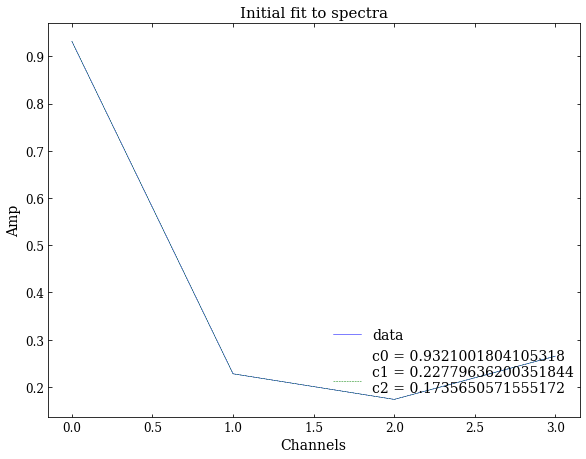

2022-06-08 22:33:48,818 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 2
2022-06-08 22:33:48,822 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.9321001804105318, 0.22779636200351844, 0.1735650571555172, 117.13154730159398, 2546.0589698987937, 65.89493036887866, 1.0, 467.8]
2022-06-08 22:33:48,936 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-06-08 22:33:49,590 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-08 22:33:49,595 - sgram_fit -burstfit.fit - INFO - c0: 0.7463671902751875 +- 0.13767352515060804
2022-06-08 22:33:49,600 - sgram_fit -burstfit.fit - INFO - c1: 0.2733556343912488 +- 0.10635456488026529
2022-06-08 22:33:49,605 - sgram_fit -burstfit.fit - INFO - c2: 0.2082779201122983 +- 0.10705760012613875
2022-06-08 22:33:49,609 - sgram_fit -burstfit.fit - INFO - S: 113.8176679418905 +- 8.034612319893176
2022-06-08 22:33:49,614 - sgram_fit -burstfit.

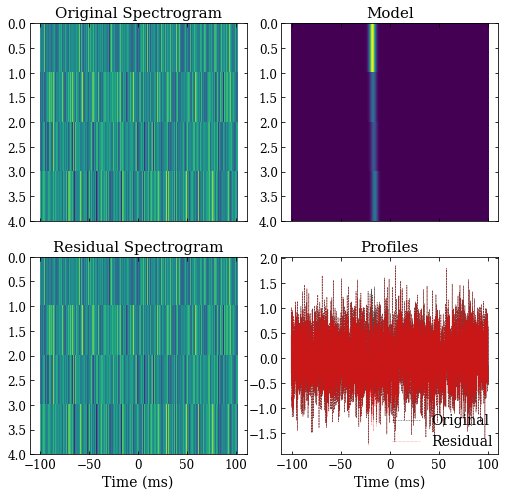

2022-06-08 22:33:50,165 - model -burstfit.fit - INFO - Making model.
2022-06-08 22:33:50,166 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 22:33:50,174 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 22:33:50,177 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-08 22:33:50,179 - model -burstfit.fit - INFO - Making model.
2022-06-08 22:33:50,181 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 22:33:50,188 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.983529675764262
2022-06-08 22:33:50,190 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-08 22:33:50,192 - fitall -burstfit.fit - INFO - Final number of components 2 > 1. Fitting all components together.
2022-06-08 22:33:50,194 - fit_all_components -burstfit.fit - INFO - Fitting 2 components together.
2022-0

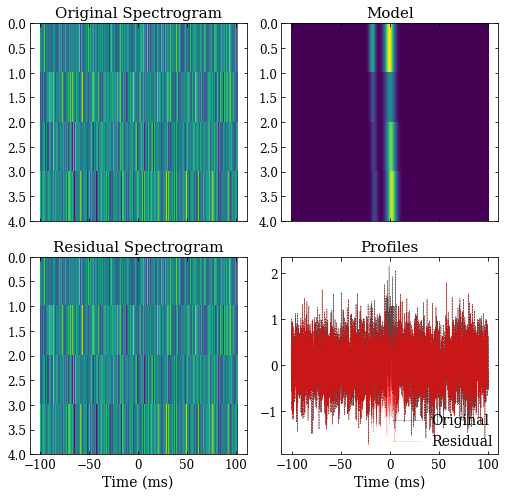

2022-06-08 22:33:52,766 - model -burstfit.fit - INFO - Making model.
2022-06-08 22:33:52,769 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 22:33:52,774 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-08 22:33:52,776 - get_off_pulse_region -burstfit.fit - INFO - Using sgram all-component-fit parameters.
2022-06-08 22:33:52,778 - model -burstfit.fit - INFO - Making model.
2022-06-08 22:33:52,779 - model -burstfit.fit - INFO - Found 2 components.
2022-06-08 22:33:52,784 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.9832997940217199
2022-06-08 22:33:52,785 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-08 22:33:52,787 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-08 22:33:52,789 - tests -root - INFO - P values: T-test (0.10740), Kruskal (0.08986), KS (0.09352), F-test (0.98205)
2022-06-08 22:3

{bf}.calc_redchisq()= 0.9832997940217199


In [21]:
bf_S1T2_c2 = paper_fit.fit_paper_curvefit(bd, data_burst, ['S', 'mu_t', 'sigma_t', 'tau'], pulse_fn, 
          [(0, 2500, 0, 0),(np.inf, 3500, 3*bd.width, np.inf)], 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 2, plot = True)


### Run MCMC after checking all curvfit results

2022-06-08 22:33:52,827 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-08 22:33:52,829 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [4.36108528e-01 2.28938668e-01 3.55085839e-01 5.02951222e+02
 3.05308814e+03 1.00652122e+02 4.73635418e+02]
2022-06-08 22:33:52,832 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-08 22:33:52,833 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-08 22:33:52,835 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*max_sigma_t_prior. Setting its min value of prior to 0.
2022-06-08 22:33:52,855 - run_mcmc -burstfit.mcmc - INFO - Running MCMC with the following parameters: nwalkers=60, nsteps=5000, start_pos_dev=0.01, ncores=4, skip=500
2022-06-08 22:33:52,857 - run_mcmc -burstfit.mcmc - INFO - Priors used in MCMC are:
2022-06-08 22:33:52,858 - run_mcmc -burst

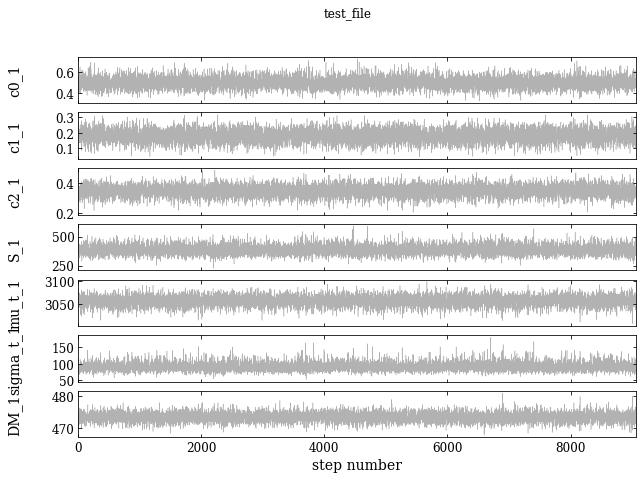

<Figure size 432x288 with 0 Axes>

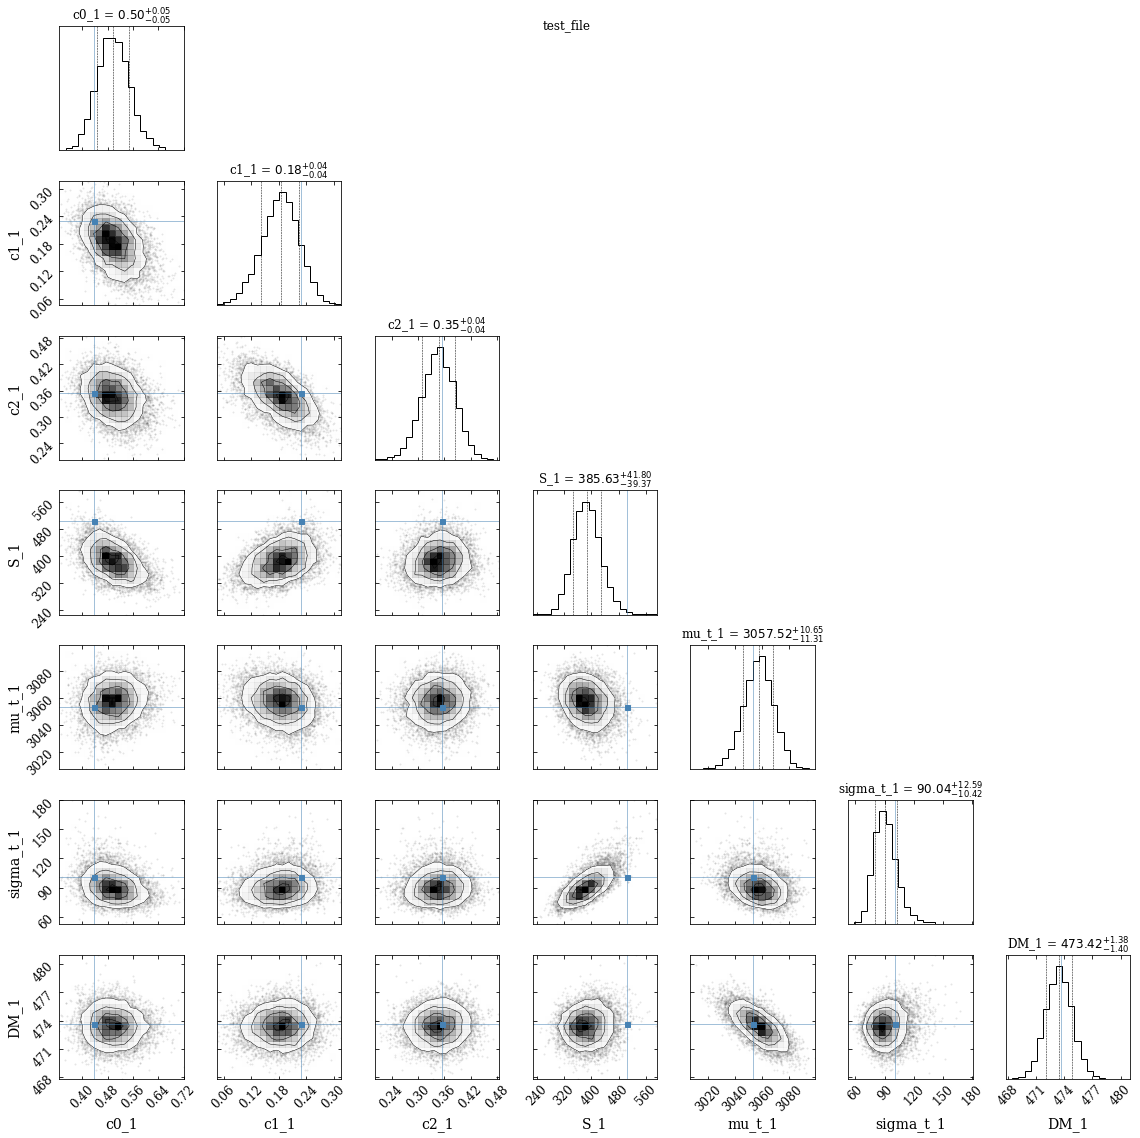

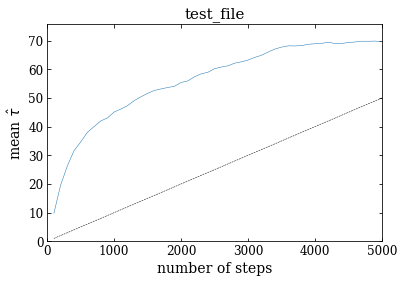

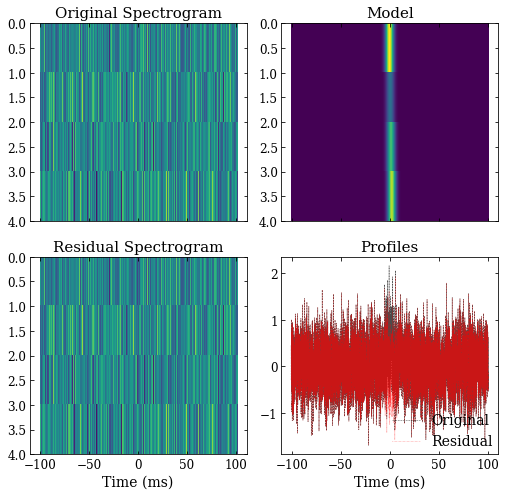

{bf}.bic =  24437.87787644085


0

In [22]:
paper_fit.fit_paper_mcmc_bic(bf_S1T1_c1, mcmc=True)

2022-06-08 22:42:23,696 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-08 22:42:23,698 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [4.36108528e-01 2.28938668e-01 3.55085839e-01 5.02951222e+02
 3.05308814e+03 1.00652122e+02 4.73635418e+02 8.20271277e-01
 3.44965995e-01 2.21933299e-01 7.47251672e+01 2.50085855e+03
 3.34123799e+01 4.67858776e+02]
2022-06-08 22:42:23,700 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-08 22:42:23,701 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-08 22:42:23,702 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*max_sigma_t_prior. Setting its min value of prior to 0.
2022-06-08 22:42:23,712 - run_mcmc -burstfit.mcmc - INFO - Running MCMC with the following parameters: nwalkers=60, nsteps=5000, start_pos_dev=0.01, ncores=4, skip=500
2022-06-08 22:42:2

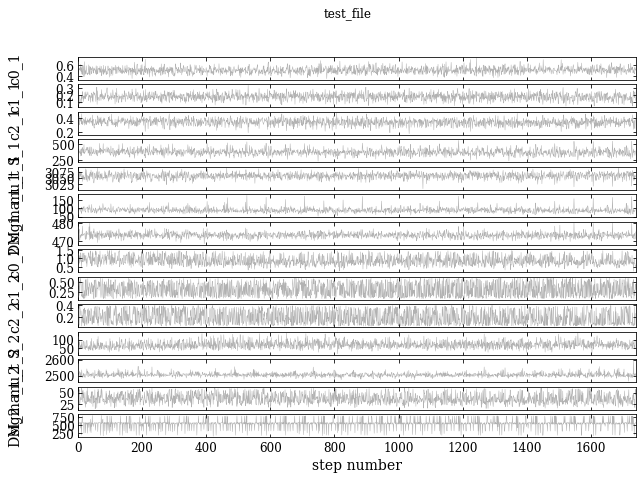

<Figure size 432x288 with 0 Axes>

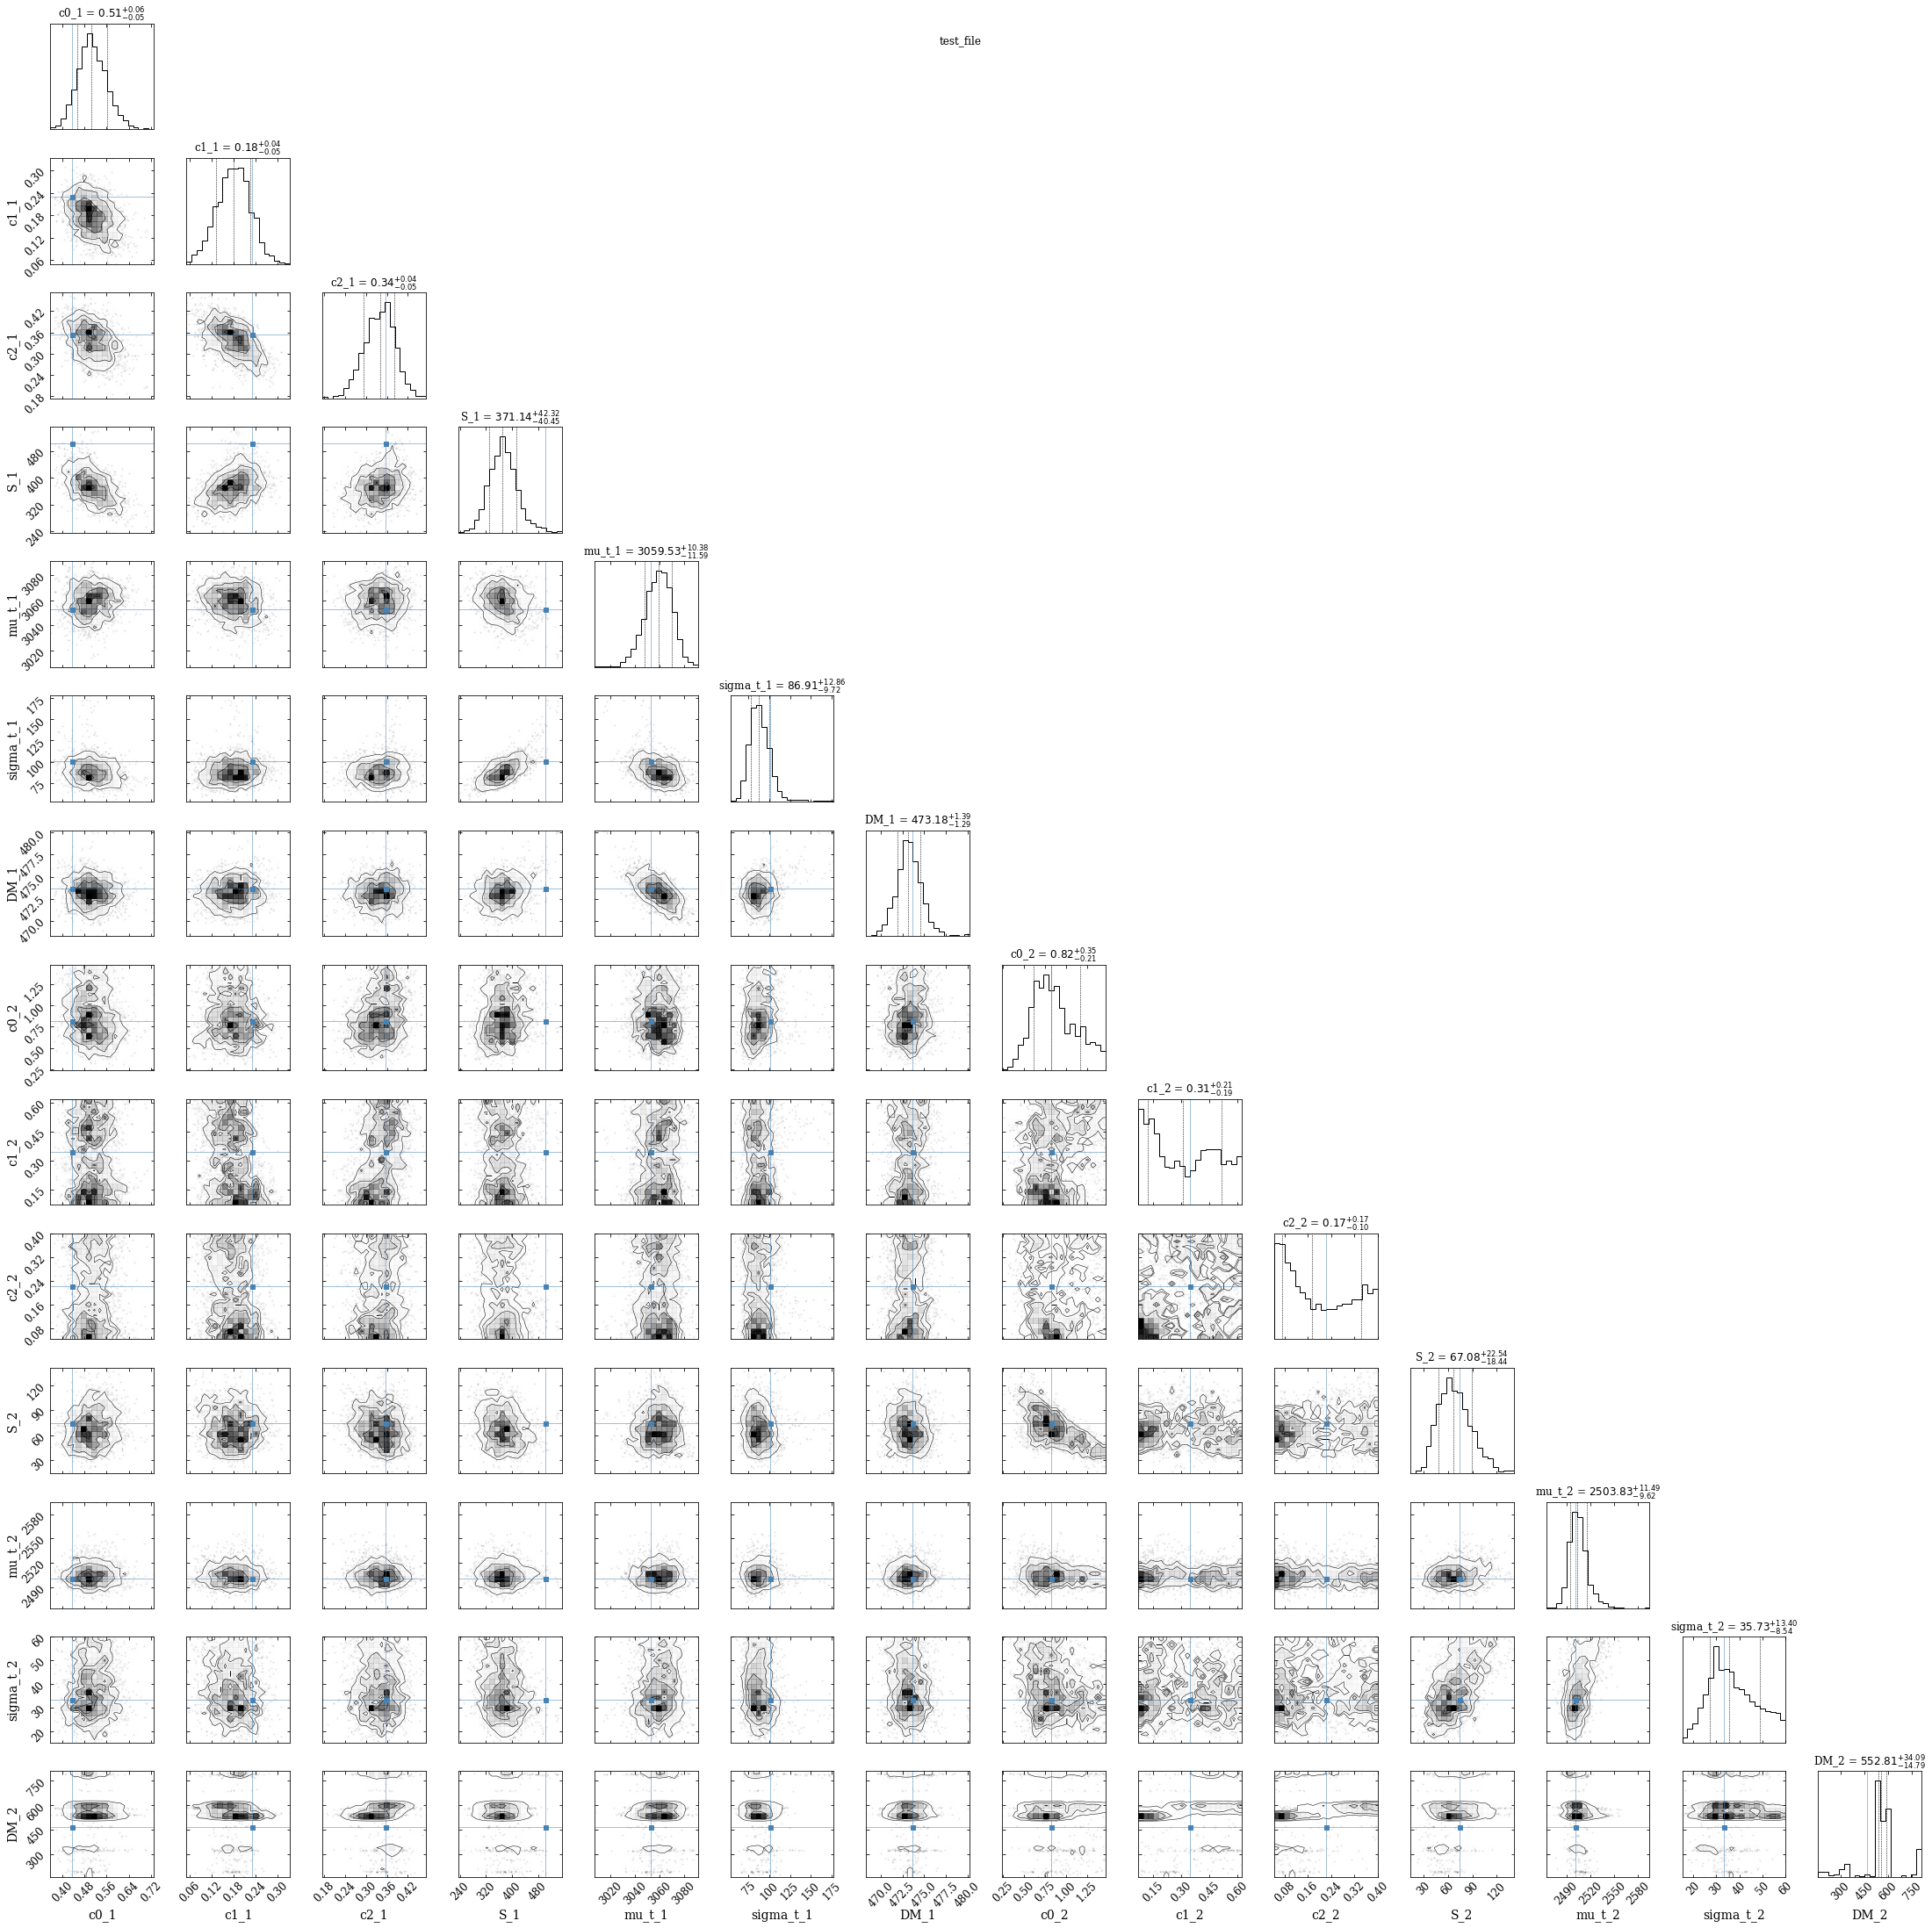

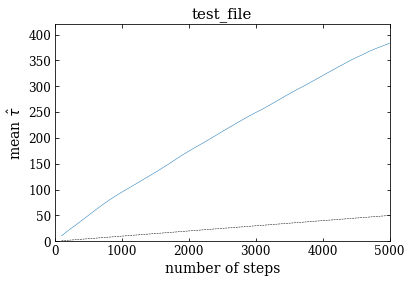

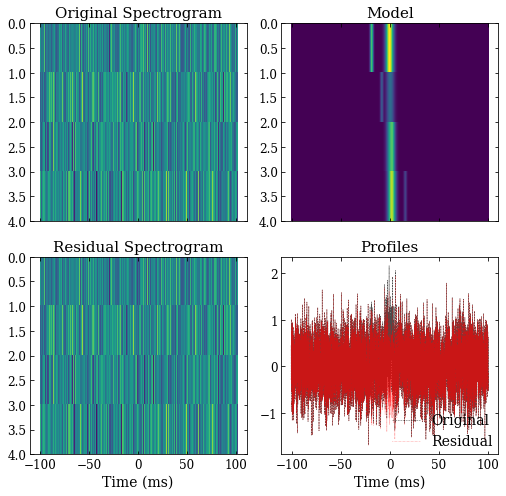

{bf}.bic =  24477.105873387434


0

In [23]:
paper_fit.fit_paper_mcmc_bic(bf_S1T1_c2, mcmc=True)

2022-06-08 22:52:43,417 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-08 22:52:43,419 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [4.50350199e-01 2.05031375e-01 3.62915914e-01 4.91043101e+02
 3.05675092e+03 1.09578802e+02 1.00000000e+00 4.73397125e+02]
2022-06-08 22:52:43,422 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-08 22:52:43,423 - set_priors -burstfit.mcmc - INFO - Found tau in param_names. Setting its min value of prior to 0.
2022-06-08 22:52:43,424 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-08 22:52:43,425 - set_priors -burstfit.mcmc - INFO - Found sigma_t and tau in param_names. Setting its max value of prior to 2*(max_tau_prior(1.8) + max_sigma_t_prior(197.241844341585))
2022-06-08 22:52:43,427 - set_priors -burstfit.mcmc - INFO - Found S and sigma_t in param_names. Setting its max value of prior to 500*max(ts)*max_sigma_t_prio

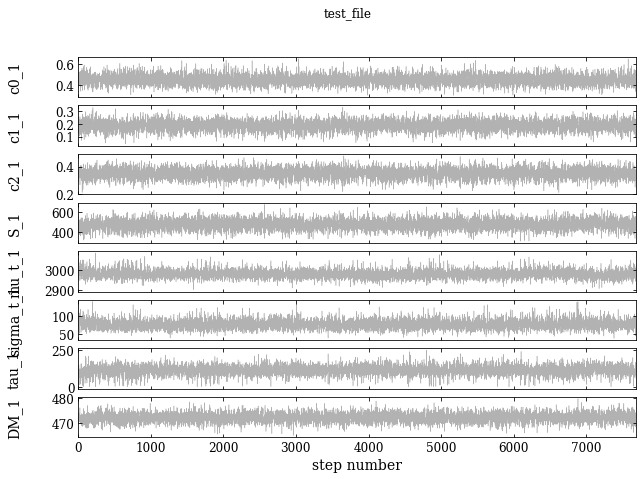

<Figure size 432x288 with 0 Axes>

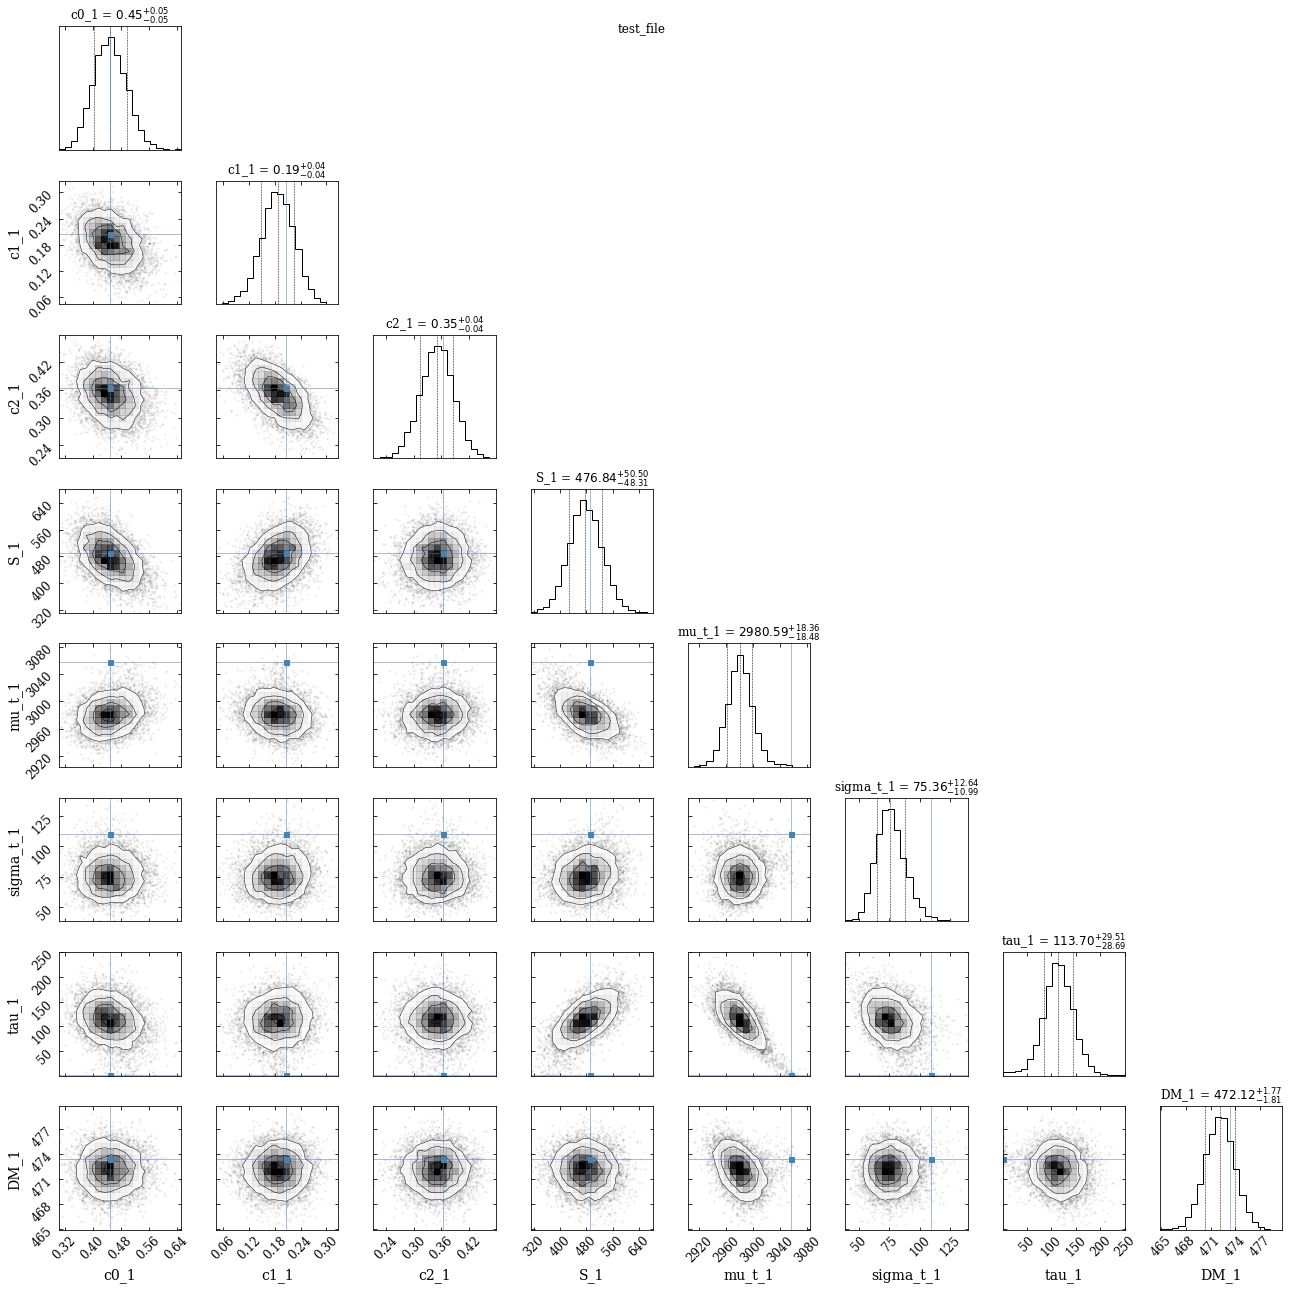

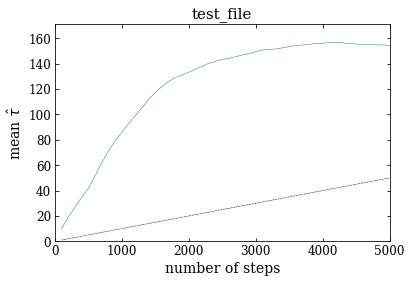

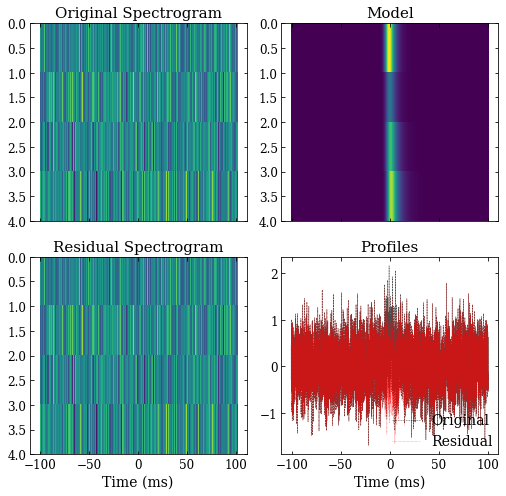

{bf}.bic =  24445.482257377826


0

In [24]:
paper_fit.fit_paper_mcmc_bic(bf_S1T2_c1, mcmc=True)

2022-06-08 23:03:31,455 - set_initial_pos -root - INFO - Setting initial positions for MCMC.
2022-06-08 23:03:31,457 - set_initial_pos -burstfit.mcmc - INFO - Initial guess for MCMC is: [4.45755390e-01 2.17667926e-01 3.54294518e-01 4.90423714e+02
 3.05403418e+03 1.10032959e+02 1.00000000e+00 4.73641125e+02
 7.18154466e-01 2.96447921e-01 2.18370065e-01 1.13484188e+02
 2.52485420e+03 6.75000273e+01 1.00000000e+00 4.73558066e+02]
2022-06-08 23:03:31,459 - set_priors -burstfit.mcmc - INFO - Setting priors for MCMC.
2022-06-08 23:03:31,461 - set_priors -burstfit.mcmc - INFO - Found tau in param_names. Setting its min value of prior to 0.
2022-06-08 23:03:31,462 - set_priors -burstfit.mcmc - INFO - Found sigma_t in param_names. Setting its min value of prior to 0.
2022-06-08 23:03:31,464 - set_priors -burstfit.mcmc - INFO - Found sigma_t and tau in param_names. Setting its max value of prior to 2*(max_tau_prior(1.8) + max_sigma_t_prior(198.05932629363338))
2022-06-08 23:03:31,465 - set_prior

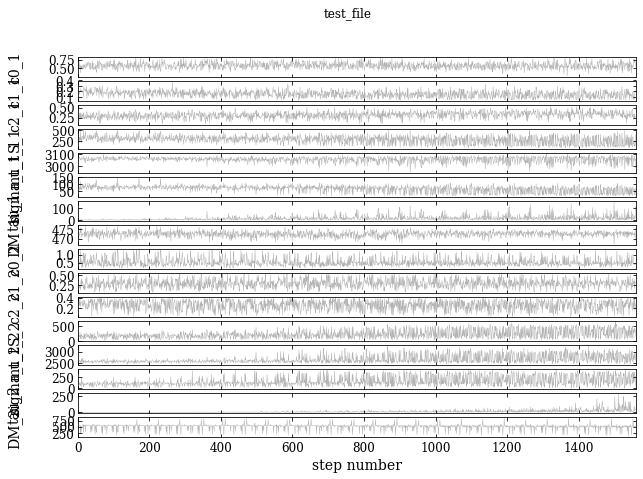

<Figure size 432x288 with 0 Axes>

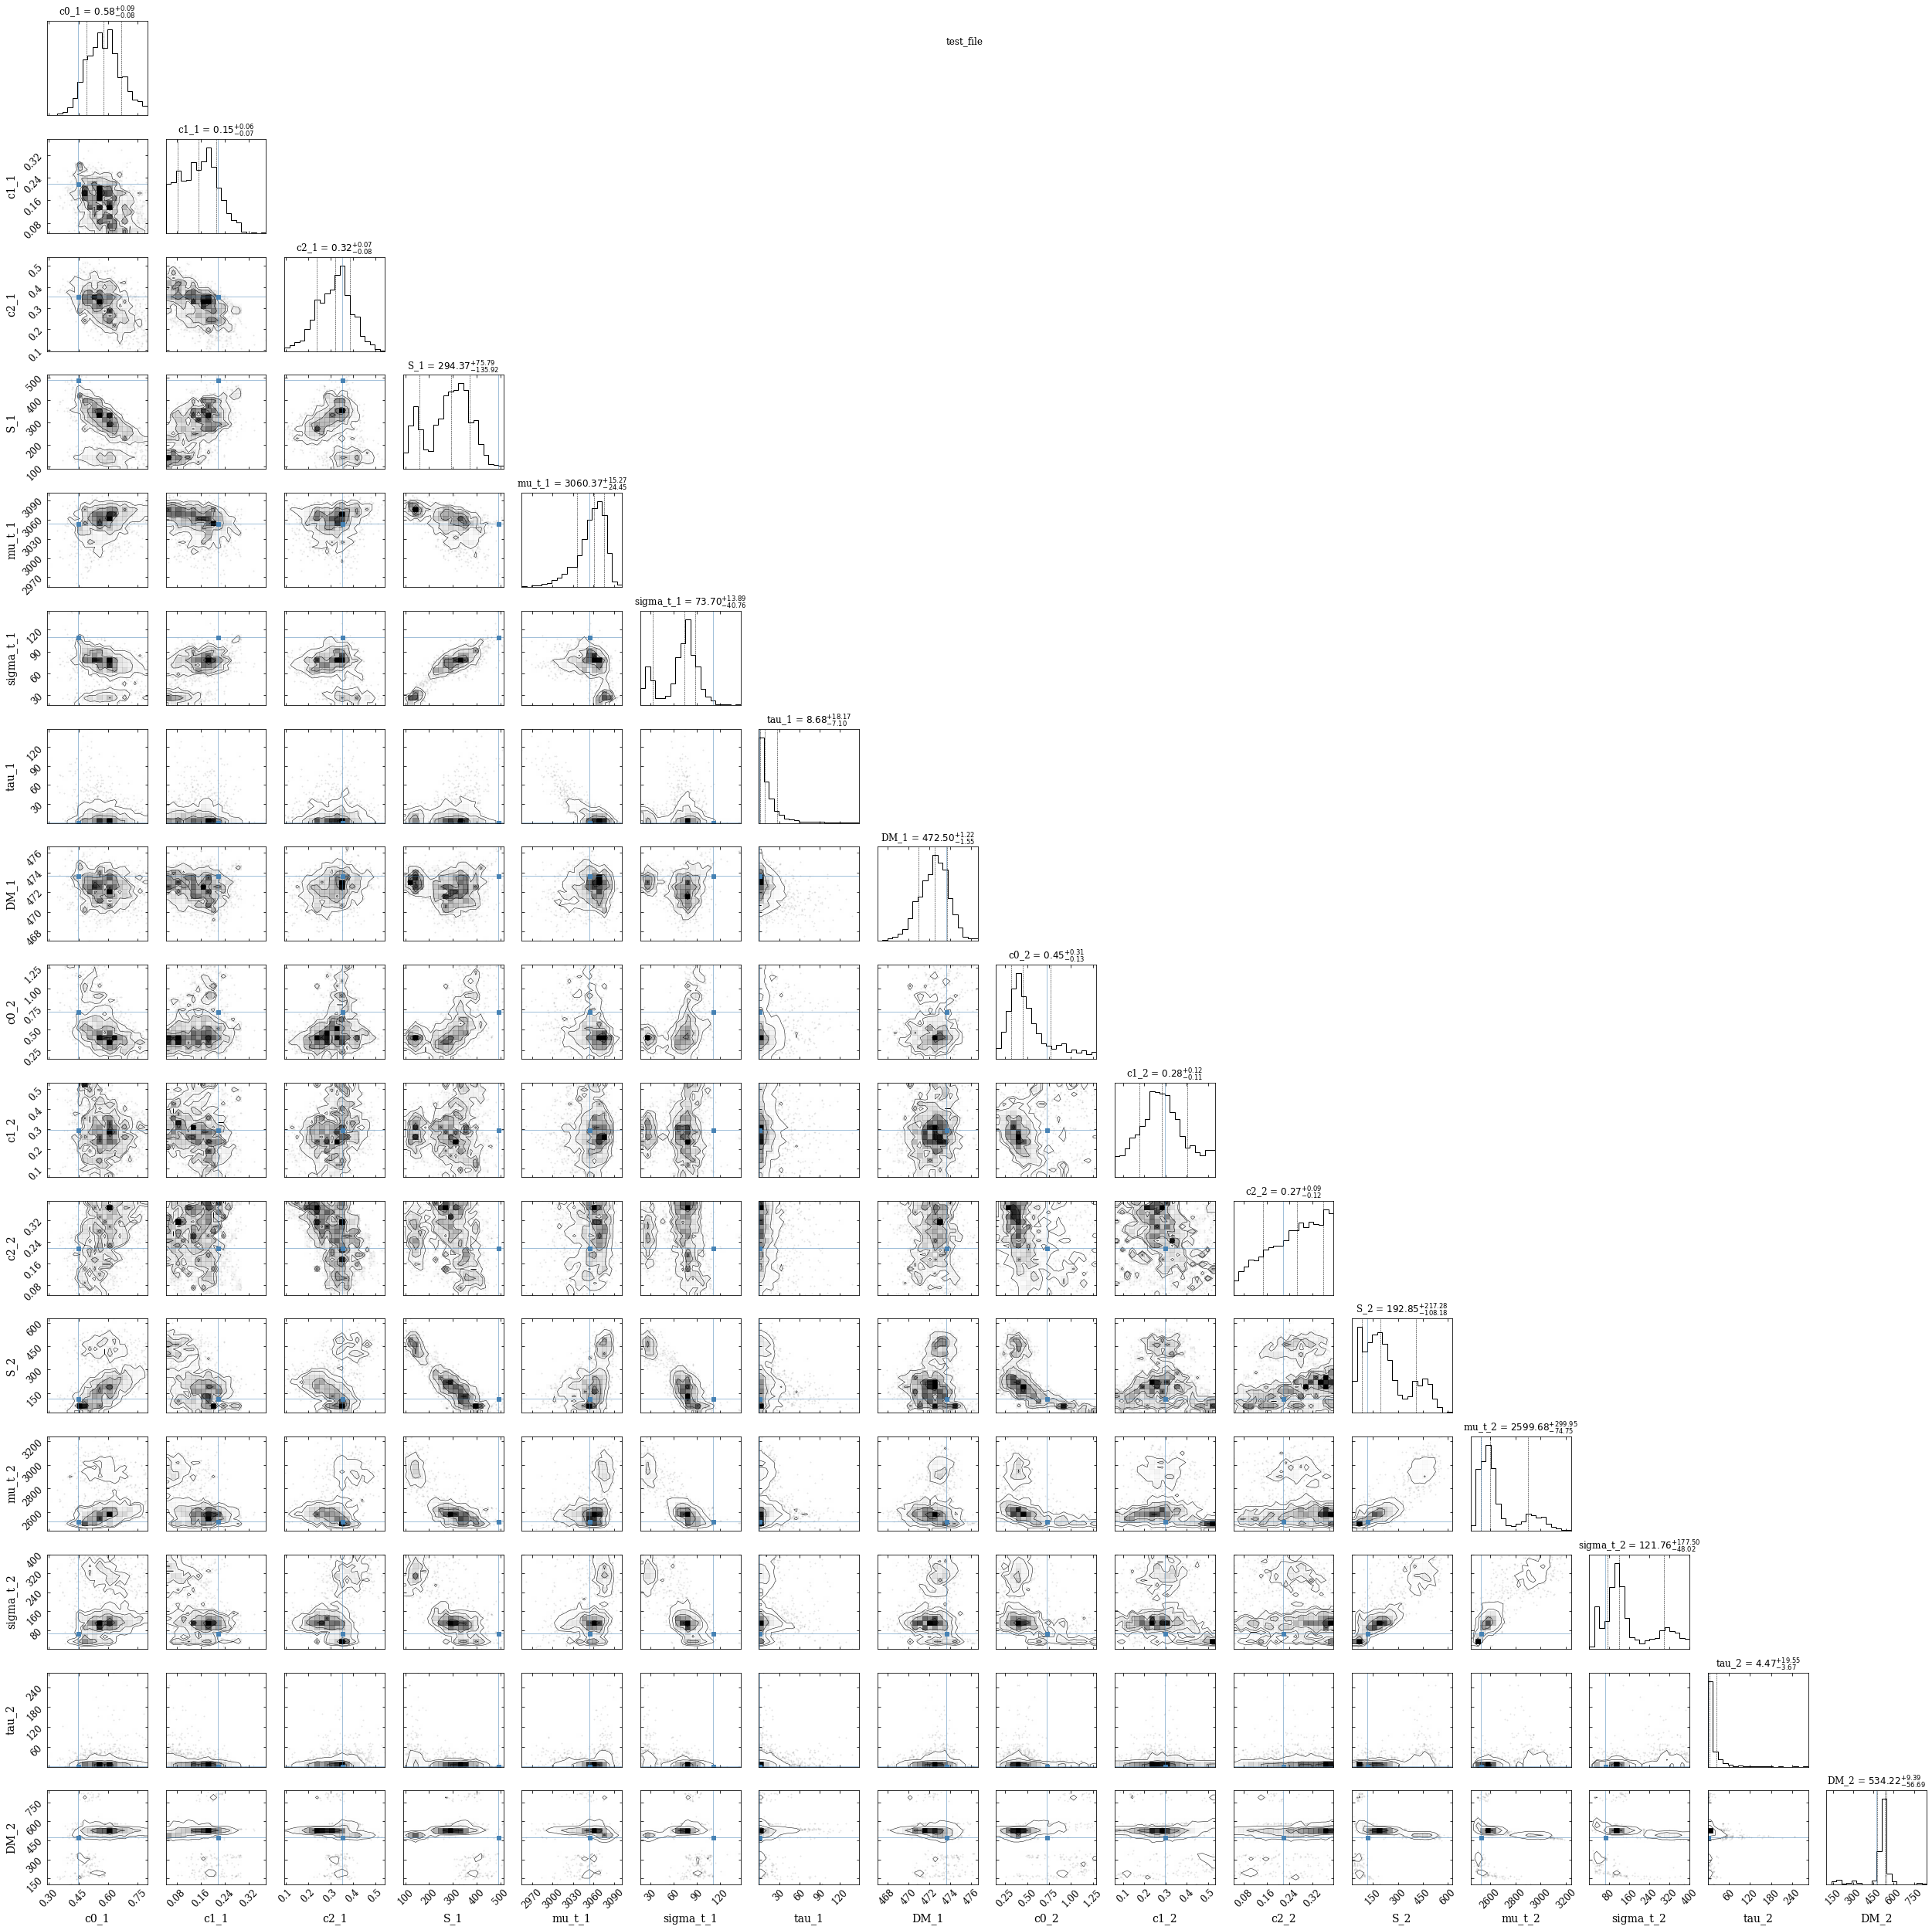

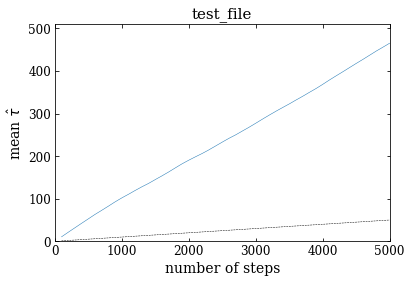

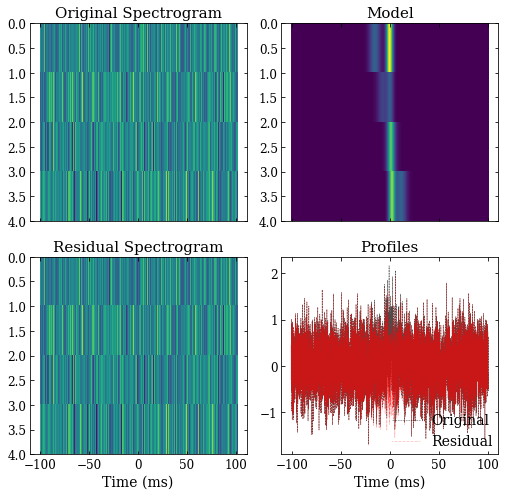

{bf}.bic =  24502.611210820884


0

In [25]:
paper_fit.fit_paper_mcmc_bic(bf_S1T2_c2, mcmc=True)

### select model and save results 

In [35]:
def select_model(bf_name_list):
    bf_with_bic_list = []
    bic_list = []
    
    for name in bf_name_list:

        if name in globals() or name in locals():
            bf = globals()[name]

            if bf.bic is None: 
                print("%s.bic not found"%name)

            else:         
                bf_with_bic_list = np.append(bf_with_bic_list, name)
                bic_list = np.append(bic_list, bf.bic)
        
        else:
            print("%s not used"%name)

    sorted_bf = ([x for _,x in sorted(zip(bic_list, bf_with_bic_list))])  
    sorted_bic = sorted(bic_list)

    print(sorted_bf) 
    print(sorted_bic)
    
    return sorted_bf, sorted_bic


def save_results(file, candidate, bf_name):
    bf_best = globals()[bf_name]
    with open(file, "a") as f:
        print(candidate, file=f)
        print(bf_name, file=f)
        for ncomp in range(bf_best.ncomponents):
            for i in range(len(bf_best.param_names)):
                print("${:.4}^{{+{:.2}}}_{{-{:.2}}}$".format(bf_best.mcmc_params[ncomp + 1]['popt'][i], 
                                                             bf_best.mcmc_params[ncomp + 1]['perr'][i][0], 
                                                             bf_best.mcmc_params[ncomp + 1]['perr'][i][1]),
                     file=f) 
                
        print("\n", file = f)
    
    return 0



# sorted_bf, sorted_bic = paper_fit.select_model(["bf_S1T1_c1", "bf_S1T1_c2", "bf_S1T1_c3", "bf_S1T2_c1", "bf_S1T2_c2", "bf_S1T2_c3"])
# paper_fit.save_results(file, candidate, bf_name)

sorted_bf, sorted_bic = select_model(["bf_S1T1_c1", "bf_S1T1_c2", "bf_S1T1_c3", "bf_S1T2_c1", "bf_S1T2_c2", "bf_S1T2_c3"])

file = "paper_fit_result.txt"
bf_name = sorted_bf[0]
save_results(file, candidate, bf_name)

bf_S1T1_c3 not used
bf_S1T2_c3 not used
['bf_S1T1_c1', 'bf_S1T2_c1', 'bf_S1T1_c2', 'bf_S1T2_c2']
[24437.87787644085, 24445.482257377826, 24477.105873387434, 24502.611210820884]


In [34]:
np.shape(data_burst)

(4, 6144)